In [48]:
import sklearn
import numpy as np
import scipy as sp
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.spatial.distance as sdist

In [42]:
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import NearestCentroid
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import train_test_split
from mpl_toolkits.mplot3d import Axes3D

In [33]:
df = pd.read_csv("TP1_data.csv", index_col=0)

In [4]:
df.head()

,attribut1,attribut2,attribut3,attribut4,classe
id1,38.0,33.0,10.0,19.0,0
id2,38.2,23.4,17.0,16.6,0
id3,33.0,24.0,19.0,23.0,0
id4,31.0,21.0,29.0,16.0,0
id5,37.0,27.0,24.0,12.0,0


In [5]:
df.describe()

,attribut1,attribut2,attribut3,attribut4,classe
count,59.000000,59.000000,59.000000,59.000000,59.000000
mean,49.793220,23.486441,9.594915,14.557627,0.915254
std,10.490782,3.531995,8.174992,4.057994,0.815542
min,28.700000,16.500000,0.000000,3.700000,0.000000
25%,40.850000,21.050000,2.400000,12.000000,0.000000
50%,49.000000,23.300000,9.000000,15.100000,1.000000
75%,59.200000,25.100000,13.000000,16.950000,2.000000
max,68.500000,33.000000,29.100000,23.000000,2.000000


In [34]:
X = df[['attribut1', 'attribut2', 'attribut3', 'attribut4']]
target = df['classe'].values
classes = np.unique(target)

df_c0 = df[df.classe==0].drop("classe",axis=1)
df_c1 = df[df.classe==1].drop("classe",axis=1)
df_c2 = df[df.classe==2].drop("classe",axis=1)

In [7]:
# scaler = StandardScaler()
# features = df.iloc[:, :-1]
# scaler.fit(features)

# normalized_df = pd.DataFrame(scaler.transform(features), columns=['attribut1', 'attribut2', 'attribut3', 'attribut4'])
# normalized_df['classe'] = df['classe'].values

# #normalized_df = df   # NO NORMALISATION

# normalized_df_c0 = normalized_df[normalized_df.classe==0].drop("classe",axis=1)
# normalized_df_c1 = normalized_df[normalized_df.classe==1].drop("classe",axis=1)
# normalized_df_c2 = normalized_df[normalized_df.classe==2].drop("classe",axis=1)


# X = normalized_df[['attribut1', 'attribut2', 'attribut3', 'attribut4']]
# target = normalized_df['classe'].values
# classes = np.unique(target)

# 1. Représentation des données:

### Visualisation

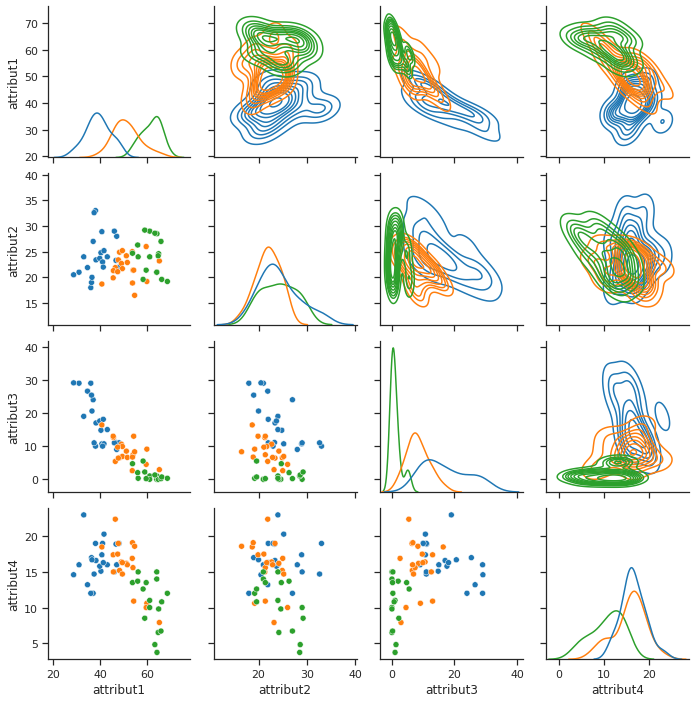

In [8]:
sns.set(style="ticks")

graph2 = sns.PairGrid(df, hue="classe", palette="tab10")
graph2.map_lower(sns.scatterplot)
graph2.map_upper(sns.kdeplot)
graph2.map_diag(sns.kdeplot)

# graph3 = sns.pairplot(df, hue="classe", diag_kind="hist", corner=True)
# graph3.map_lower(sns.kdeplot, levels=4, color=".2")   # kde: Kernel Density Estimate


### T-SNE Visualisation

In [9]:
tsne = TSNE()
X_tsne = tsne.fit_transform(X)

Text(0, 0.5, 'tsne axe 2')

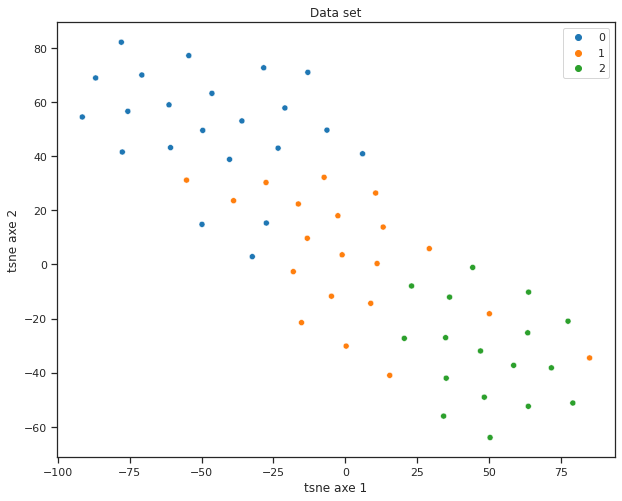

In [10]:
fig, axes = plt.subplots(1, 1,figsize=(10,8))
sns.scatterplot(x=X_tsne[:,0], y=X_tsne[:,1], hue=target, palette='tab10')
axes.set_title('Data set')
axes.set_xlabel("tsne axe 1")
axes.set_ylabel("tsne axe 2")

### Corrélation

<AxesSubplot:>

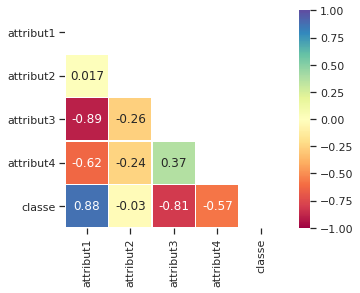

In [11]:
corr_df = df.corr(method='pearson')
corr_c0_df = df_c0.corr(method='pearson')
corr_c1_df = df_c1.corr(method='pearson')
corr_c2_df = df_c2.corr(method='pearson')


# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr_df, dtype=bool))
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_df, mask=mask, cmap='Spectral', vmax=1, vmin=-1, center=0, annot=True,
            square=True, linewidths=.5)


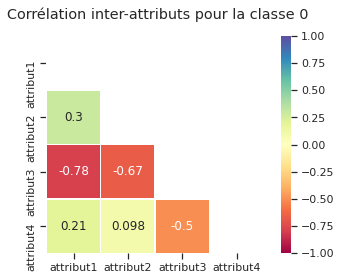

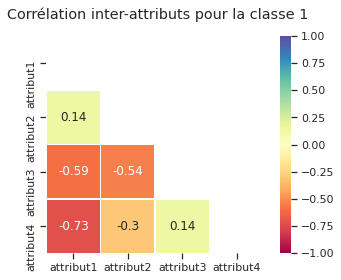

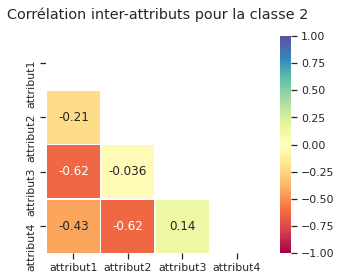

In [12]:
correlations = [corr_c0_df, corr_c1_df, corr_c2_df]
for _index, _corr in enumerate(correlations):
    mask = np.triu(np.ones_like(_corr, dtype=bool))
    plt.figure(_index)
    plt.suptitle("Corrélation inter-attributs pour la classe %i" %_index)
    sns.heatmap(_corr,  mask=mask, vmax=1, vmin=-1, center=0,
            square=True, cmap='Spectral', annot=True, linewidth=0.5)
    plt.show()

## (a)

Suite à la visualisation, ainsi que l'analyse de corrélation de l'ensemble de données, nous constatons qu'il serait favorable de procéder à une analyse des composantes principales.

Effectivement, nous constatons que l'attribut1 ainsi que l'attribut3 semble corrélé peu importe la classe sous analyse.

De plus, nous remarquons que l'_attribut2_ présente une très faible corrélation (proche de 0) par rapport à l'ensemble de classes.  (PAS CERTAIN)

/home/ggibeau/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


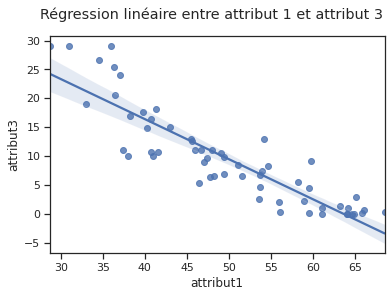

In [13]:
sns.regplot(df.loc[:, 'attribut1'], df.loc[:, 'attribut3'])
plt.suptitle("Régression linéaire entre attribut 1 et attribut 3")
plt.show()


### Analyse ACP

In [14]:
X.head()

,attribut1,attribut2,attribut3,attribut4
id1,38.0,33.0,10.0,19.0
id2,38.2,23.4,17.0,16.6
id3,33.0,24.0,19.0,23.0
id4,31.0,21.0,29.0,16.0
id5,37.0,27.0,24.0,12.0


In [15]:
pca_full = PCA(n_components=X.shape[1])
pca_full.fit(X)
X_pca_full = pca_full.transform(X)

print("PCA(4) explained variance: ", pca_full.explained_variance_ratio_, "which sum up to: ",
      np.round(pca_full.explained_variance_ratio_.sum()*100, 2), "%")

PCA(4) explained variance:  [0.8418103  0.08441998 0.06948166 0.00428806] which sum up to:  100.0 %


On constate que les variables _attribut1_, _attribut2_, _attribut3_ expliquent plus de 99% de la variance.

In [16]:
def distanceToCentroidErrors(features, target, classes, distance_fct=sdist.euclidean, VI=None):
    """
    inputs
    ------
    features: numpy array
    target: numpy array
    classes: numpy array representing the unique classes
    
    outputs
    -------
    errors_df: pandas dataframe
    """
    centroids = []
    centroids_dict = {}
    for _classe in classes:
        target_mask = target == _classe
        features_masked = features[target_mask]
        centroid = features_masked.mean(axis=0)
        centroids.append(centroid)
        centroids_dict[_classe] = centroid
        
    centroid_targets = []
    for _feature in features:
        if VI is None:
            centroid_targets.append(np.argmin([distance_fct(_feature, centroid) for centroid in centroids]))
        else:
            centroid_targets.append(np.argmin([distance_fct(_feature, centroid, VI) for centroid in centroids]))

    errors_df = pd.DataFrame({'actual_classes': target, 'reduction_classes': centroid_targets})
    errors_df['divergence'] = (errors_df['actual_classes'] != errors_df['reduction_classes']).astype(int)
    
    return errors_df, centroids_dict

## (b)

# VISUALISATION PCA(2) ?!?

### 2CP Comparaison

In [17]:
pca_2 = PCA(n_components=2)
pca_2.fit(X)
X_pca_2 = pca_2.transform(X)
print("PCA(2) explained variance: ", pca_2.explained_variance_ratio_, "which sum up to: ",
      np.round(pca_2.explained_variance_ratio_.sum()*100, 2), "%")

errors_df, centroids_dict = distanceToCentroidErrors(X_pca_2, target, classes, distance_fct=sdist.euclidean)
errors_pct = np.round(errors_df['divergence'].sum() / errors_df.shape[0], 3)
print("2CP - Il y a un total de {0} erreurs sur  {1}, soit: {2} %.".format(
    errors_df['divergence'].sum(), errors_df.shape[0], errors_pct))

PCA(2) explained variance:  [0.8418103  0.08441998] which sum up to:  92.62 %
2CP - Il y a un total de 10 erreurs sur  59, soit: 0.169 %.


### 3CP Comparaison

In [18]:
pca_3 = PCA(n_components=3)
pca_3.fit(X)
X_pca_3 = pca_3.transform(X)
print("PCA(3) explained variance: ", pca_3.explained_variance_ratio_, "which sum up to: ",
      np.round(pca_3.explained_variance_ratio_.sum()*100, 2), "%")

errors_df, _ = distanceToCentroidErrors(X_pca_3, target, classes, distance_fct=sdist.euclidean)
errors_pct = np.round(errors_df['divergence'].sum() / errors_df.shape[0], 3)
print("3CP - Il y a un total de {0} erreurs sur  {1}, soit: {2} %.".format(
    errors_df['divergence'].sum(), errors_df.shape[0], errors_pct))


PCA(3) explained variance:  [0.8418103  0.08441998 0.06948166] which sum up to:  99.57 %
3CP - Il y a un total de 9 erreurs sur  59, soit: 0.153 %.


# 2. Mesure de distance:

## UTILISATION DE PCA(3) : semble le plus legit (a confirmer) ^^^^^^^^^^^

## (a)

In [19]:
X_pca = X_pca_3

### Distance Manhattan

In [20]:
errors_df, _ = distanceToCentroidErrors(X_pca, target, classes, distance_fct=sdist.cityblock)

errors_pct = np.round(errors_df['divergence'].sum() / errors_df.shape[0], 3)
print("Manhanttan - Il y a un total de {0} erreurs sur  {1}, soit: {2} %.".format(
    errors_df['divergence'].sum(), errors_df.shape[0], errors_pct))

Manhanttan - Il y a un total de 10 erreurs sur  59, soit: 0.169 %.


### Distance Euclidienne

In [21]:
errors_df, _ = distanceToCentroidErrors(X_pca, target, classes, distance_fct=sdist.euclidean)

errors_pct = np.round(errors_df['divergence'].sum() / errors_df.shape[0], 3)
print("Euclidean - Il y a un total de {0} erreurs sur  {1}, soit: {2} %.".format(
    errors_df['divergence'].sum(), errors_df.shape[0], errors_pct))


Euclidean - Il y a un total de 9 erreurs sur  59, soit: 0.153 %.


### Distance Mahalanobis

Il n'est pas necessaire d'appliquer une analyse de reduction de dimensions dans le cas de la distance de Mahalanobis. Nous pouvons donc utiliser l'ensemble de depart.

In [22]:
cov_matrix = X.cov()
inverted_cov_matrix = np.linalg.inv(cov_matrix)

In [23]:
errors_df, centroids_dict = distanceToCentroidErrors(X.values, target, classes,
                                                     distance_fct=sdist.mahalanobis, VI=inverted_cov_matrix)

errors_pct = np.round(errors_df['divergence'].sum() / errors_df.shape[0], 3)
print("Mahalanobis - Il y a un total de {0} erreurs sur  {1}, soit: {2} %.".format(
    errors_df['divergence'].sum(), errors_df.shape[0], errors_pct))

Mahalanobis - Il y a un total de 9 erreurs sur  59, soit: 0.153 %.


## (b)

#### Classe - 0

In [24]:
cov_matrix_c0 = df_c0.cov()
inverted_cov_matrix_c0 = np.linalg.inv(cov_matrix_c0)

In [25]:
errors_df, centroids_dict = distanceToCentroidErrors(X.values, target, classes,
                                                     distance_fct=sdist.mahalanobis, VI=inverted_cov_matrix_c0)

errors_pct = np.round(errors_df['divergence'].sum() / errors_df.shape[0], 3)
print("Mahalanobis (Inverted Matrix c0) - Il y a un total de {0} erreurs sur  {1}, soit: {2} %.".format(
    errors_df['divergence'].sum(), errors_df.shape[0], errors_pct))

Mahalanobis (Inverted Matrix c0) - Il y a un total de 8 erreurs sur  59, soit: 0.136 %.


#### Classe - 1

In [26]:
cov_matrix_c1 = df_c1.cov()
inverted_cov_matrix_c1 = np.linalg.inv(cov_matrix_c1)

In [27]:
errors_df, centroids_dict = distanceToCentroidErrors(X.values, target, classes,
                                                     distance_fct=sdist.mahalanobis, VI=inverted_cov_matrix_c1)

errors_pct = np.round(errors_df['divergence'].sum() / errors_df.shape[0], 3)
print("Mahalanobis (Inverted Matrix c1) - Il y a un total de {0} erreurs sur  {1}, soit: {2} %.".format(
    errors_df['divergence'].sum(), errors_df.shape[0], errors_pct))

Mahalanobis (Inverted Matrix c1) - Il y a un total de 2 erreurs sur  59, soit: 0.034 %.


#### Classe - 2

In [28]:
cov_matrix_c2 = df_c2.cov()
inverted_cov_matrix_c2 = np.linalg.inv(cov_matrix_c2)

In [29]:
errors_df, centroids_dict = distanceToCentroidErrors(X.values, target, classes,
                                                     distance_fct=sdist.mahalanobis, VI=inverted_cov_matrix_c2)

errors_pct = np.round(errors_df['divergence'].sum() / errors_df.shape[0], 3)
print("Mahalanobis (Inverted Matrix c2) - Il y a un total de {0} erreurs sur  {1}, soit: {2} %.".format(
    errors_df['divergence'].sum(), errors_df.shape[0], errors_pct))

Mahalanobis (Inverted Matrix c2) - Il y a un total de 14 erreurs sur  59, soit: 0.237 %.


#### graphiques des erreurs de classification

Text(0.5, 0.92, 'Erreurs de classification en utilisant la distance euclidienne')

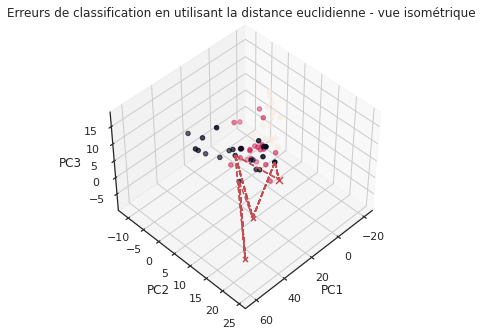

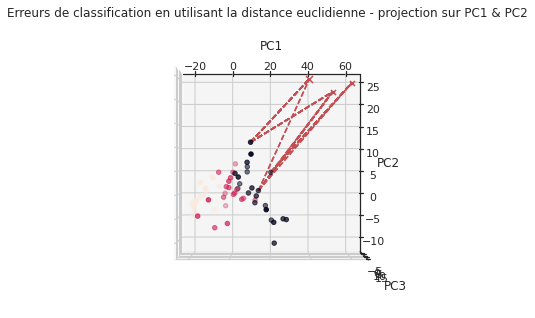

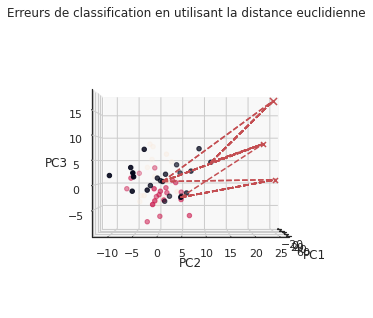

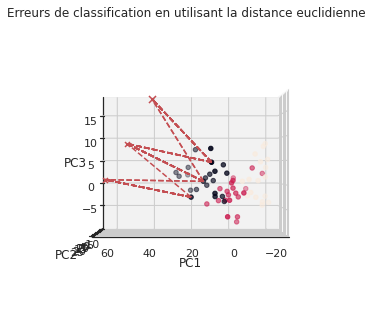

In [45]:
def PlotPC3D(X, Y, Z, elevation:int, azimut:int, error_vector:pd.DataFrame):
    fig = plt.figure()
    ax = Axes3D(fig, elev=elevation, azim=azimut)

    #Here we plot the data points for each class
    ax.scatter(X, Y, Z, c= target)

    # Here we plot the centroids of each class in the 3D Graphs
    ax.scatter(x=centroids_dict[0][0], y=centroids_dict[0][1], z=centroids_dict[0][2], marker='x', c='r',
               depthshade=True, s = 50)
    ax.scatter(x=centroids_dict[1][0], y=centroids_dict[1][1], z=centroids_dict[1][2], marker='x', c='r',
               depthshade=True, s = 50)
    ax.scatter(x=centroids_dict[2][0], y=centroids_dict[2][1], z=centroids_dict[2][2], marker='x', c='r',
               depthshade=True, s = 50)

    ax.set_xlabel('PC1')
    ax.set_ylabel('PC2')
    ax.set_zlabel('PC3')

    centroids = np.array([centroids_dict[0], centroids_dict[1], centroids_dict[2]])

    # Here we plot the dote-lined red error vectors in the 3D Graphs
    for index, err in error_vector.iterrows():
        err_vec_xs = np.array([X_pca_3[int(err[0]), 0], centroids[int(err[1]), 0]])
        err_vec_ys = np.array([X_pca_3[int(err[0]), 1], centroids[int(err[1]), 1]])
        err_vec_zs = np.array([X_pca_3[int(err[0]), 2], centroids[int(err[1]), 2]])
        ax.plot(err_vec_xs, err_vec_ys, err_vec_zs, 'r--')

    return fig, ax

# Plot some error vectors graphs
_, ax1 = PlotPC3D(X_pca_3[:, 0], X_pca_3[:, 1], X_pca_3[:, 2], elevation=45, azimut=45,
                  error_vector=errors_df)
_, ax2 = PlotPC3D(X_pca_3[:, 0], X_pca_3[:, 1], X_pca_3[:, 2], elevation=90, azimut=270,
                  error_vector=errors_df)
_, ax3 = PlotPC3D(X_pca_3[:, 0], X_pca_3[:, 1], X_pca_3[:, 2], elevation=0, azimut=0,
                  error_vector=errors_df)
_, ax4 = PlotPC3D(X_pca_3[:, 0], X_pca_3[:, 1], X_pca_3[:, 2], elevation=0, azimut=90,
                  error_vector=errors_df)

ax1.set_title('Erreurs de classification en utilisant la distance euclidienne - vue isométrique')
ax2.set_title('Erreurs de classification en utilisant la distance euclidienne - projection sur PC1 & PC2')
ax3.set_title('Erreurs de classification en utilisant la distance euclidienne')
ax4.set_title('Erreurs de classification en utilisant la distance euclidienne')

In [39]:
centroids_dict[1]


array([51.315, 21.975,  8.35 , 15.71 ])

### Classification

In [30]:
ransformed_3CP_c = {}
y = df.classe.copy()
X = df.drop("classe", 1)
df = pd.concat([X, y], axis=1)

pca_knn = PCA(n_components = 3)
centered_X_knn = X - np.mean(X)
pca_knn.fit(centered_X_knn, y)

pca_3CP_c = []
centroids_3CP = {}
transformed_3CP_c = {}

for y_i in y.unique():
    transformed_3CP_c[y_i] = pca_knn.transform(df.loc[df['classe'] == y_i].drop('classe', 1))
    centroids_3CP[y_i] = transformed_3CP_c[y_i].mean(axis=0)   
    pca_3CP_c.extend(transformed_3CP_c[y_i])

tranformed_c = transformed_3CP_c

covariance_for_class = {}
for y_i in y.unique():
    covariance_for_class[y_i] = np.linalg.inv(np.cov(tranformed_c[y_i], rowvar=False))

def get_neighbors_knn(train, label, test_row, k_neighbors):
    distances = list()
    for i, train_row in enumerate(train):
        dist = sdist.mahalanobis(train_row, test_row, covariance_for_class.get(label[i]))
        distances.append((label[i], dist))
    distances.sort(key=lambda tup: tup[1])
    neighbors_label = list()
    for i in range(k_neighbors):
        neighbors_label.append(distances[i][0])
    return neighbors_label

pca = np.array(X_pca_3)
k=5
nb_iter = 100
scores = 0
for it in range(nb_iter):
    X_train, X_test, y_train, y_test = train_test_split(pca, y, test_size=0.2, stratify=y)
    errors_knn = 0
    for i, x_i_test in enumerate(X_test):
        neighbors_label = get_neighbors_knn(X_train, y_train, x_i_test, k)
        prediction = max(neighbors_label, key=neighbors_label.count)
        if prediction != y_test[i]: errors_knn += 1
    scores += 1 - errors_knn/len(X_test)
print(f"Justesse test {scores/nb_iter:.3%}")

Justesse test 82.500%


### Nearest centroide

In [49]:
nb_iter = 500
scores = 0
for it in range(nb_iter):
    errors_nc = 0
    X_train, X_test, y_train, y_test = train_test_split(pca, y, test_size=0.1, stratify=y,
                                                        random_state=np.random.randint(0, 42), shuffle=True)
    centroids_x_train, cov_matrix_x_train = {}, {}
    centroids_x_train_mean, cov_matrix_x_train_mean = [0, 0, 0], [0, 0, 0]
    for y_i in y_train.unique():
        xx = X_train[y_train == y_i]
        centroids_x_train[y_i] = np.mean(xx, axis=0)
        cov_matrix_x_train[y_i] = np.linalg.inv(np.cov(xx, rowvar=False))

        centroids_x_train_mean[y_i] += centroids_x_train[y_i]
        cov_matrix_x_train_mean[y_i] += cov_matrix_x_train[y_i]

    for i, x_i_test in enumerate(X_test):
        dist = [sdist.mahalanobis(x_i_test, centroids_x_train.get(j), cov_matrix_x_train.get(j))
                for j in range(len(centroids_x_train))]
        centroid_label = np.argmin(dist)
        if centroid_label != y_test[i]:
            errors_nc += 1
    scores += 1 - errors_nc/len(X_test)

print(f"Justesse test {scores/nb_iter:.3%}")

# On stocke les centroides et les matrices de covariance associées utiles pour la prédiction
centroids_x_train_mean = np.divide(centroids_x_train_mean, nb_iter)
cov_matrix_x_train_mean = np.divide(cov_matrix_x_train_mean, nb_iter)

Justesse test 84.300%


In [51]:
"""
The next section has been adapted from the code available on the Sci-Kit learn web site:
https://scikit-learn.org/stable/auto_examples/mixture/plot_gmm_covariances.html#sphx-glr-auto-examples-mixture-plot-gmm-covariances-py

Start of adapted section
"""
cov_type = ['full', 'tied', 'diag', 'spherical']
scores_train, scores_test = np.zeros(len(cov_type)), np.zeros(len(cov_type))

nb_iter = 100
for it in range(nb_iter):
    X_train, X_test, y_train, y_test = train_test_split(pca, y, test_size=0.2, stratify=y)
    centroids_x_train_gaussian = [0, 0, 0]
    centroids_x_train_gaussian[0] = np.mean(X_train[y_train == 0], axis=0)
    centroids_x_train_gaussian[1] = np.mean(X_train[y_train == 1], axis=0)
    centroids_x_train_gaussian[2] = np.mean(X_train[y_train == 2], axis=0)

    for i, ct in enumerate(cov_type):
        gm = GaussianMixture(n_components=3, covariance_type=ct, means_init = centroids_x_train_gaussian)
        gm.fit(X_train, y=y_train)

        y_train_pred = gm.predict(X_train)
        scores_train[i] += np.mean(y_train_pred == y_train)
        y_test_pred = gm.predict(X_test)
        scores_test[i] += np.mean(y_test_pred == y_test)

print("Score de justesse en fonction du type de covariance:")
for i, ct in enumerate(cov_type):
    print(f"{ct} :  entraînement: {scores_train[i]/nb_iter:.3%} - test: {scores_test[i]/nb_iter:.3%}")

Score de justesse en fonction du type de covariance:
full :  entraînement: 76.787% - test: 72.667%
tied :  entraînement: 75.809% - test: 70.667%
diag :  entraînement: 75.106% - test: 73.167%
spherical :  entraînement: 81.936% - test: 80.500%
